# Adding imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Getting dataset

In [2]:
datasets = pd.read_csv('heart.csv')
print(datasets)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [3]:
datasets['RestingECG_1'] = datasets['RestingECG'].apply(lambda x: 1 if x == 'LVH' else 0)
datasets['RestingECG_2'] = datasets['RestingECG'].apply(lambda x: 1 if x == 'ST' else 0)
datasets.drop(columns=['RestingECG'], inplace=True)
print(datasets)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  \
0     40   M           ATA        140          289          0    172   
1     49   F           NAP        160          180          0    156   
2     37   M           ATA        130          283          0     98   
3     48   F           ASY        138          214          0    108   
4     54   M           NAP        150          195          0    122   
..   ...  ..           ...        ...          ...        ...    ...   
913   45   M            TA        110          264          0    132   
914   68   M           ASY        144          193          1    141   
915   57   M           ASY        130          131          0    115   
916   57   F           ATA        130          236          0    174   
917   38   M           NAP        138          175          0    173   

    ExerciseAngina  Oldpeak ST_Slope  HeartDisease  RestingECG_1  RestingECG_2  
0                N      0.0       Up             0    

In [4]:
for pain_type in ['NAP', 'ATA', 'ASY']:
    new_column_name = f'CP_{pain_type}' 
    datasets[new_column_name] = datasets['ChestPainType'].apply(lambda x: 1 if x == pain_type else 0)

datasets.drop(columns=['ChestPainType'], inplace=True)
print(datasets)

     Age Sex  RestingBP  Cholesterol  FastingBS  MaxHR ExerciseAngina  \
0     40   M        140          289          0    172              N   
1     49   F        160          180          0    156              N   
2     37   M        130          283          0     98              N   
3     48   F        138          214          0    108              Y   
4     54   M        150          195          0    122              N   
..   ...  ..        ...          ...        ...    ...            ...   
913   45   M        110          264          0    132              N   
914   68   M        144          193          1    141              N   
915   57   M        130          131          0    115              Y   
916   57   F        130          236          0    174              N   
917   38   M        138          175          0    173              N   

     Oldpeak ST_Slope  HeartDisease  RestingECG_1  RestingECG_2  CP_NAP  \
0        0.0       Up             0             

## Getting dependent and independent variables 

In [5]:
X = datasets.iloc[:, 0:14].values
y = datasets.iloc[:, 14].values
print(X)
print(y)
accuracyArray = []

[[40 'M' 140 ... 0 0 1]
 [49 'F' 160 ... 0 1 0]
 [37 'M' 130 ... 1 0 1]
 ...
 [57 'M' 130 ... 0 0 0]
 [57 'F' 130 ... 0 0 1]
 [38 'M' 138 ... 0 1 0]]
[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0
 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0
 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 

In [6]:
for i in range(0, len(X)):
    if X[i][1] == 'M' :
        X[i][1] = 1
    else:
        X[i][1] = 0
print(X)

[[40 1 140 ... 0 0 1]
 [49 0 160 ... 0 1 0]
 [37 1 130 ... 1 0 1]
 ...
 [57 1 130 ... 0 0 0]
 [57 0 130 ... 0 0 1]
 [38 1 138 ... 0 1 0]]


In [7]:
for i in range(0, len(X)):
    if X[i][6] == 'Y' :
        X[i][6] = 1
    else:
        X[i][6] = 0
print(X)

[[40 1 140 ... 0 0 1]
 [49 0 160 ... 0 1 0]
 [37 1 130 ... 1 0 1]
 ...
 [57 1 130 ... 0 0 0]
 [57 0 130 ... 0 0 1]
 [38 1 138 ... 0 1 0]]


In [8]:
for i in range(0, len(X)):
    if X[i][8] == 'Up' :
        X[i][8] = 1
    else:
        X[i][8] = 0
print(X)

[[40 1 140 ... 0 0 1]
 [49 0 160 ... 0 1 0]
 [37 1 130 ... 1 0 1]
 ...
 [57 1 130 ... 0 0 0]
 [57 0 130 ... 0 0 1]
 [38 1 138 ... 0 1 0]]


# Now implementing models 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2 / 10, random_state=0);

# Logistic Regression

In [10]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1
 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0]


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9619565217391305


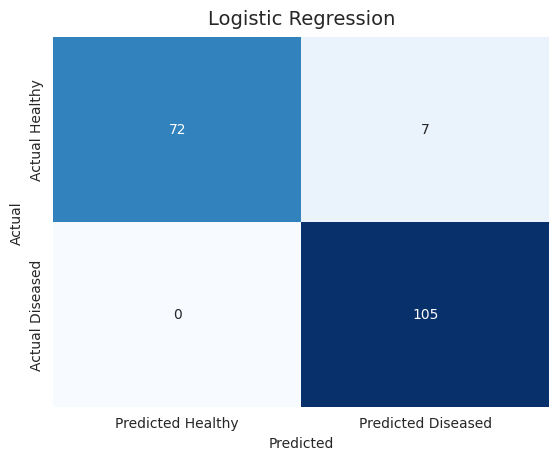

In [13]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Healthy', 'Predicted Diseased'],
            yticklabels=['Actual Healthy', 'Actual Diseased'])
plt.text(0.5, 1.05, 'Logistic Regression', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Support Vector Machine

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [16]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1
 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0]


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9456521739130435


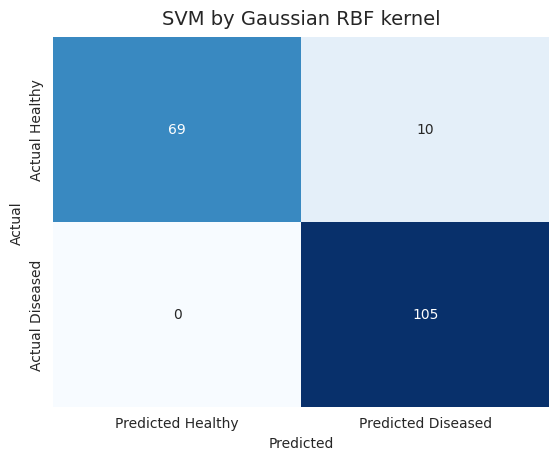

In [18]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Healthy', 'Predicted Diseased'],
            yticklabels=['Actual Healthy', 'Actual Diseased'])
plt.text(0.5, 1.05, 'SVM by Gaussian RBF kernel', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Decision Tree Regression

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train.reshape(-1, 1))

DecisionTreeRegressor(random_state=0)

In [20]:
y_pred = regressor.predict(X_test)
print(y_pred)

[1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.]


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9021739130434783


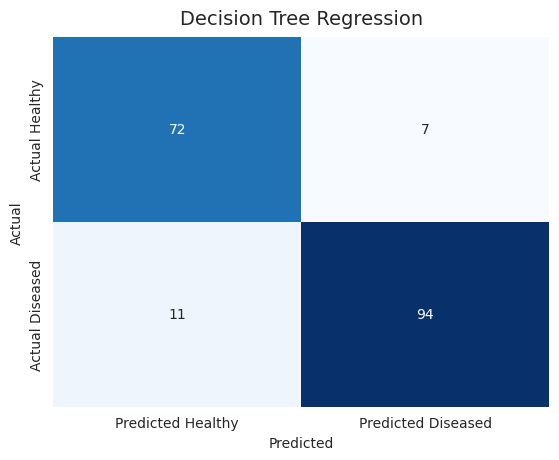

In [22]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Healthy', 'Predicted Diseased'],
            yticklabels=['Actual Healthy', 'Actual Diseased'])
plt.text(0.5, 1.05, 'Decision Tree Regression', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# Random Forest Regression

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X, y.ravel())

RandomForestRegressor(random_state=0)

In [24]:
y_pred = regressor.predict(X_test)
y_pred = np.where(y_pred >= .5, 1, 0)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0]


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.7554347826086957


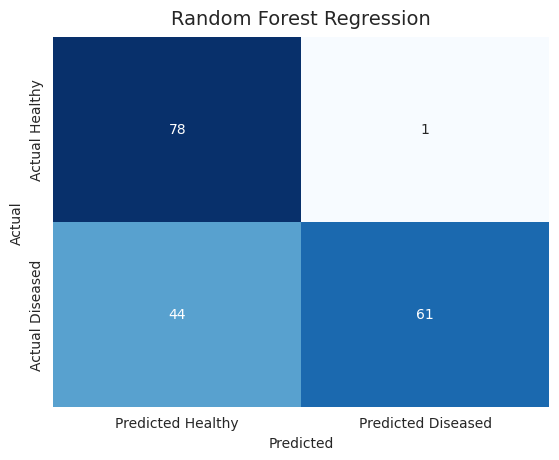

In [26]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Healthy', 'Predicted Diseased'],
            yticklabels=['Actual Healthy', 'Actual Diseased'])
plt.text(0.5, 1.05, 'Random Forest Regression', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

# K-NN Classification

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0]


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
correct_predictions = np.trace(cm)
total_predictions = np.sum(cm)
accuracy = correct_predictions / total_predictions
accuracyArray.append(accuracy)
print("Accuracy from confusion matrix:", accuracy)

Accuracy from confusion matrix: 0.9130434782608695


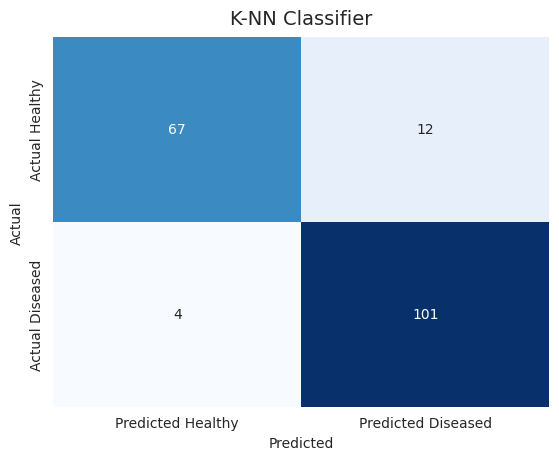

In [31]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Healthy', 'Predicted Diseased'],
            yticklabels=['Actual Healthy', 'Actual Diseased'])
plt.text(0.5, 1.05, 'K-NN Classifier', size=14, ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.title('Confusion Matrix')
plt.show()

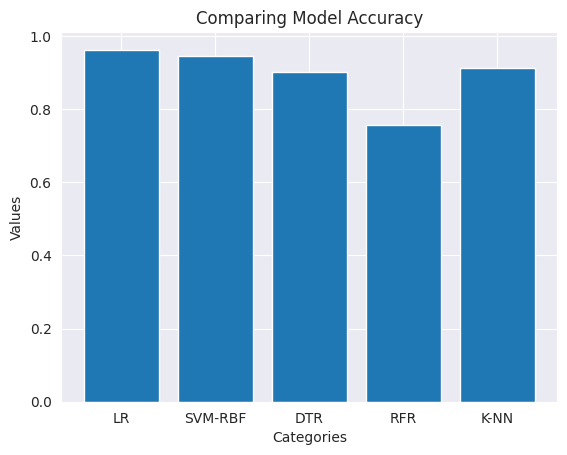

In [32]:
indices = np.arange(len(accuracyArray))
category_names = np.array(['LR', 'SVM-RBF', 'DTR', 'RFR', 'K-NN'])

plt.bar(indices, accuracyArray)

plt.xticks(indices, category_names)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparing Model Accuracy')

plt.show()